# Demo: Camtrap DP Metadata Standards with InsectAI Extension

This notebook demonstrates how insect monitoring data is structured and validated using the **Camtrap Data Package (Camtrap DP)** standard with extensions for **InsectAI** — including support for annotations, AI models, and observations across multiple deployments.

---

<img src="logos/insectAI.svg" alt="InsectAI Logo" width="300"/>
<img src="logos/tdwg-logo-short.svg" alt="CamtrapDP Logo" width="325"/>

---


## Metadata Package

We have created a simulated **InsectAI-compatible Camtrap DP dataset** containing the following metadata tables:

<table>
  <tr>
    <td>
      <ul>
        <li><code>datapackage.json</code> – Frictionless metadata descriptor linking all tables</li>
        <li><code>deployments.csv</code> – Describes camera trap setups at multiple locations</li>
        <li><code>media.csv</code> – Records image-level metadata including file paths and timestamps</li>
        <li><code>annotations.csv</code> – Includes human and machine-labeled bounding boxes for insects</li>
        <li><code>models.csv</code> – Documents the AI model used for automated detection</li>
        <li><code>observations.csv</code> – Captures consensus observations per image or event</li>
      </ul>
    </td>
    <td style="vertical-align: top; padding-left: 20px;">
      <img src="logos/Screenshot from 2025-05-05 15-59-59.png" alt="meta-std" width="400"/>
    </td>
  </tr>
</table>

This demo dataset is created using:

Sittinger, M. (2023). *Image dataset for training of an insect detection model for the Insect Detect DIY camera trap* [Data set]. Zenodo.  
[https://doi.org/10.5281/zenodo.7725941](https://doi.org/10.5281/zenodo.7725941)


In [1]:
import os

base_path = "insectai-demo-dataset"
print("Metadata Package Contents:\n")
for file in sorted(os.listdir(base_path)):
    print(" -", file)


Metadata Package Contents:

 - annotations.csv
 - datapackage.json
 - deployments.csv
 - media.csv
 - models.csv
 - observations.csv


********************************************************************************************
********************************************************************************************

<img src="logos/Screenshot from 2025-05-05 15-59-59.png" alt="meta-std" width="400"/>

## Project Metadata (`datapackage.json`)

This file contains the high-level metadata for the dataset and follows the [Frictionless Data Package](https://specs.frictionlessdata.io/data-package/) specification.

It includes:
- A unique `name` and descriptive `title` for the dataset
- A human-readable `description` of the dataset's contents and purpose
- A list of `resources`, each pointing to one of the core metadata tables (e.g. `deployments.csv`, `annotations.csv`, etc.)

This structure ensures that any system or validator using the Camtrap DP standard can interpret and validate the package automatically.


In [2]:
from IPython.display import JSON
import json

with open(f"{base_path}/datapackage.json") as f:
    data = json.load(f)


print(json.dumps(data, indent=2))



{
  "name": "insectai-multiloc-demo",
  "title": "InsectAI WG3 Demo Dataset",
  "description": "These toy datasets are used to demonstrate the InsectAI platform. They are not real datasets and are not intended for any real-world applications.",
  "resources": [
    {
      "path": "deployments.csv"
    },
    {
      "path": "media.csv"
    },
    {
      "path": "annotations.csv"
    },
    {
      "path": "models.csv"
    },
    {
      "path": "observations.csv"
    }
  ]
}


********************************************************************************************
********************************************************************************************

## Metadata Tables Overview

Below are previews of each metadata table in the dataset.


In [4]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

deployments = pd.read_csv(f"{base_path}/deployments.csv")
media = pd.read_csv(f"{base_path}/media.csv")
annotations = pd.read_csv(f"{base_path}/annotations.csv")
observations = pd.read_csv(f"{base_path}/observations.csv")
models = pd.read_csv(f"{base_path}/models.csv")

def section_header(title):
    style = (
        "background-color:#f4f4f4; "
        "font-size:14px; "
        "color:#333; "
        "font-weight:600; "
        "padding:6px 10px; "
        "margin-top:10px; "
        "border-left:4px solid #999;"
    )
    return widgets.HTML(value=f"<div style='{style}'>{title}</div>")

display(section_header("deployments.csv"))
display(deployments.head(1))

display(section_header("media.csv"))
display(media.head(1))

display(section_header("annotations.csv"))
display(annotations.head(1))

display(section_header("observations.csv"))
display(observations.head(1))

display(section_header("models.csv"))
display(models.head(1))


HTML(value="<div style='background-color:#f4f4f4; font-size:14px; color:#333; font-weight:600; padding:6px 10p…

,deploymentID,locationID,locationName,latitude,longitude,deploymentStart,deploymentEnd,cameraModel,attractant,baitType
0,d001,loc001,Location A,34.89022,33.123841,2025-05-01T12:03:04.698609Z,2025-05-04T12:03:04.698630Z,Canon-X500,True,UV light


HTML(value="<div style='background-color:#f4f4f4; font-size:14px; color:#333; font-weight:600; padding:6px 10p…

,mediaID,deploymentID,timestamp,filePath,fileName,fileMediatype,filePublic,captureMethod
0,m_d001_1,d001,2025-05-03T12:03:04.698905Z,media/20221018_17-02-01-127317_raw_jpg.rf.0123...,20221018_17-02-01-127317_raw_jpg.rf.01232a4c2c...,image/jpeg,True,motion detection


HTML(value="<div style='background-color:#f4f4f4; font-size:14px; color:#333; font-weight:600; padding:6px 10p…

,annotationID,mediaID,deploymentID,annotationLevel,annotationType,eventStart,eventEnd,scientificName,bboxX,bboxY,bboxWidth,bboxHeight,classifiedBy,classificationMethod,classifiedByModelID,classificationTimestamp,classificationProbability
0,a0001,m_d001_1,d001,media,validation,2025-05-04T16:03:04.699402Z,2025-05-04T17:03:04.699412Z,Insecta spp.,220,286,6,8,expert1,human,NaN,2025-05-05T00:03:04.699432Z,1.0


HTML(value="<div style='background-color:#f4f4f4; font-size:14px; color:#333; font-weight:600; padding:6px 10p…

,observationID,deploymentID,mediaID,eventStart,eventEnd,observationLevel,observationType,scientificName,classificationMethod,classifiedBy,classificationTimestamp,classificationProbability
0,obs0010,d001,m_d001_7,2025-05-04T16:03:04.700352Z,2025-05-04T17:03:04.700355Z,media,validated,Insecta spp.,human,expert1,2025-05-05T08:03:04.700357Z,1.0


HTML(value="<div style='background-color:#f4f4f4; font-size:14px; color:#333; font-weight:600; padding:6px 10p…

,modelID,modelName,modelVersion,modelDescription,modelPathRepository,publicationDate,modelTask
0,mdl001,InsectNet,1.0,YOLOv5-based insect detector,https://github.com/insectai/insectnet,2025-04-01,object detection


********************************************************************************************
********************************************************************************************

## Entity-Relationship Diagram: InsectAI Metadata

In [4]:
from IPython.display import HTML

HTML("""
<iframe width="100%" height="750" 
        src="https://dbdiagram.io/e/6818b9041ca52373f5819e88/6818b9291ca52373f581a607" 
        frameborder="0" allowfullscreen></iframe>
""")

********************************************************************************************
********************************************************************************************

### Deployment Table

We now explore the `deployments.csv` table and visualize the deployment locations on a map.


In [5]:
import os
import pandas as pd
import folium
import base64

base_path = "insectai-demo-dataset"

deployments = pd.read_csv(os.path.join(base_path, "deployments.csv"))
media = pd.read_csv(os.path.join(base_path, "media.csv"))

if 'filePath' not in media.columns:
    media['filePath'] = media['fileName'].apply(lambda x: f"media/{x}")

media_counts = media.groupby('deploymentID').size().reset_index(name='mediaCount')
deployments = deployments.merge(media_counts, on='deploymentID', how='left')
deployments['mediaCount'] = deployments['mediaCount'].fillna(0).astype(int)

m = folium.Map(location=[deployments['latitude'].mean(), deployments['longitude'].mean()], zoom_start=9)

for _, row in deployments.iterrows():
    popup_html = f"""
    <b>{row['locationName']}</b><br>
    Deployment ID: {row['deploymentID']}<br>
    Camera Model: {row['cameraModel']}<br>
    Start: {row['deploymentStart']}<br>
    End: {row['deploymentEnd']}<br>
    Attractant: {row['attractant']}<br>
    Bait Type: {row['baitType']}<br>
    <b>Media Files:</b> {row['mediaCount']}
    """


    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_html, max_width=200),
        icon=folium.Icon(color="green", icon="camera", prefix='fa')
    ).add_to(m)

# map
m


********************************************************************************************
********************************************************************************************

### Media Table

We now explore the `media.csv` table and visualize it.


In [7]:
import os
import pandas as pd
from ipyleaflet import Map, Marker, MarkerCluster
from ipywidgets import VBox, HTML

base_path = "insectai-demo-dataset"

deployments = pd.read_csv(os.path.join(base_path, "deployments.csv"))
media = pd.read_csv(os.path.join(base_path, "media.csv"))

if 'filePath' not in media.columns:
    media['filePath'] = media['fileName'].apply(lambda x: f"media/{x}")

info = HTML(value="<b>Click a marker to see details</b>")
info.layout.margin = '10px'

center = (deployments['latitude'].mean(), deployments['longitude'].mean())
m = Map(center=center, zoom=7)

markers = []

def make_on_click(dep_row):
    def on_click(marker=None, **kwargs):  
        dep_id = dep_row['deploymentID']
        this_media = media[media['deploymentID'] == dep_id]

        preview_links = ''.join(
            [f"<li><a href='{mrow['filePath']}' target='_blank'>{mrow['fileName']}</a></li>"
             for _, mrow in this_media.head(5).iterrows()]
        )
        more_note = ""
        if len(this_media) > 5:
            more_note = f"<i>...and {len(this_media)-5} more</i>"

        info.value = f"""
        <b>{dep_row['locationName']}</b><br>
        Deployment ID: {dep_id}<br>
        Camera Model: {dep_row['cameraModel']}<br>
        Attractant: {dep_row['attractant']}<br>
        Bait Type: {dep_row['baitType']}<br>
        Media Files: {len(this_media)}<br>
        <ul>{preview_links}</ul>{more_note}
        """
    return on_click


for _, row in deployments.iterrows():
    marker = Marker(location=(row['latitude'], row['longitude']), title=row['locationName'])
    marker.on_click(make_on_click(row))
    markers.append(marker)

m.add_layer(MarkerCluster(markers=markers))

VBox([m, info])


********************************************************************************************
********************************************************************************************

### Annotation Table

We now explore the `annotation.csv` table and visualize it.

In [8]:
annotations = pd.read_csv(os.path.join(base_path, "annotations.csv"))
annotations.head()


,annotationID,mediaID,deploymentID,annotationLevel,annotationType,eventStart,eventEnd,scientificName,bboxX,bboxY,bboxWidth,bboxHeight,classifiedBy,classificationMethod,classifiedByModelID,classificationTimestamp,classificationProbability
0,a0001,m_d001_1,d001,media,validation,2025-05-04T16:03:04.699402Z,2025-05-04T17:03:04.699412Z,Insecta spp.,220,286,6,8,expert1,human,NaN,2025-05-05T00:03:04.699432Z,1.00
1,a0002,m_d001_1,d001,media,validation,2025-05-04T16:03:04.699534Z,2025-05-04T17:03:04.699544Z,Insecta spp.,216,305,5,8,expert1,human,NaN,2025-05-05T00:03:04.699560Z,1.00
2,a0003,m_d001_2,d001,media,model,2025-05-04T16:03:04.699663Z,2025-05-04T17:03:04.699668Z,Insecta spp.,144,38,17,24,mdl001,machine,mdl001,2025-05-05T00:03:04.699686Z,0.73
3,a0004,m_d001_3,d001,media,validation,2025-05-04T16:03:04.699774Z,2025-05-04T17:03:04.699779Z,Insecta spp.,258,168,10,19,expert1,human,NaN,2025-05-05T00:03:04.699795Z,1.00
4,a0005,m_d001_4,d001,media,validation,2025-05-04T16:03:04.699863Z,2025-05-04T17:03:04.699868Z,Insecta spp.,79,167,4,11,expert1,human,NaN,2025-05-05T00:03:04.699890Z,1.00


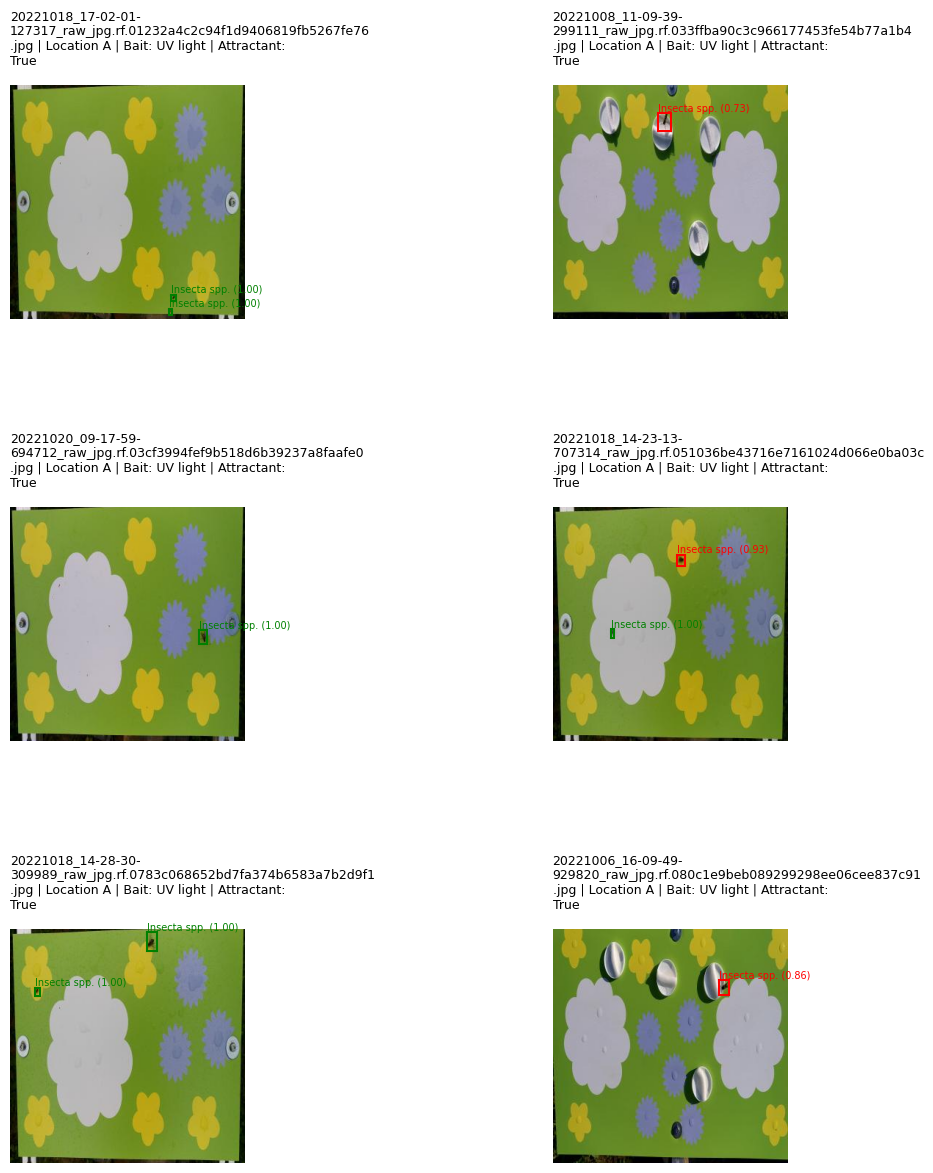

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from textwrap import wrap

def show_annotated_images(media_ids, media_df, annotations_df, deployments_df, image_base_path="./"):
    n = len(media_ids)
    cols = 2
    rows = (n + 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(12, 14))
    axes = axes.flatten()

    for i, media_id in enumerate(media_ids):
        ax = axes[i]

        media_row = media_df[media_df['mediaID'] == media_id].iloc[0]
        file_path = os.path.join(image_base_path, media_row['filePath'])

        img = Image.open(file_path)
        ax.imshow(img)
        ax.axis('off')

        dep_id = media_row['deploymentID']
        deployment_row = deployments_df[deployments_df['deploymentID'] == dep_id].iloc[0]

        title_text = (
            f"{media_row['fileName']} | "
            f"{deployment_row['locationName']} | "
            f"Bait: {deployment_row['baitType']} | "
            f"Attractant: {deployment_row['attractant']}"
        )
        wrapped_title = "\n".join(wrap(title_text, 50))
        ax.set_title(wrapped_title, fontsize=9, loc='left', pad=15)

        annots = annotations_df[annotations_df['mediaID'] == media_id]
        for _, row in annots.iterrows():
            x, y, w, h = row['bboxX'], row['bboxY'], row['bboxWidth'], row['bboxHeight']
            method = row['classificationMethod']
            label = row.get('scientificName', 'Unknown')
            prob = row.get('classificationProbability', 1.0)

            color = 'green' if method == 'human' else 'red'
            rect = patches.Rectangle((x, y), w, h, linewidth=1.5, edgecolor=color, facecolor='none')
            ax.add_patch(rect)
            ax.text(x, y - 3, f"{label} ({prob:.2f})", color=color, fontsize=7)

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.subplots_adjust(hspace=0.8, wspace=0.4)
    plt.show()

example_media_ids = annotations['mediaID'].drop_duplicates().head(6).tolist()
show_annotated_images(example_media_ids, media, annotations, deployments)


********************************************************************************************
********************************************************************************************

### Model Table

We now explore the `model.csv` table and visualize it.

In [10]:
models = pd.read_csv(os.path.join(base_path, "models.csv"))
models.head()


,modelID,modelName,modelVersion,modelDescription,modelPathRepository,publicationDate,modelTask
0,mdl001,InsectNet,1.0,YOLOv5-based insect detector,https://github.com/insectai/insectnet,2025-04-01,object detection


********************************************************************************************
********************************************************************************************

### Observation Table

We now explore the `observation.csv` table and visualize it.

In [11]:
import ipywidgets as widgets
from IPython.display import display

species_dropdown = widgets.Dropdown(
    options=sorted(observations['scientificName'].dropna().unique()),
    description='Species:',
)

def filter_species(selected_species):
    filtered = observations[observations['scientificName'] == selected_species]
    display(filtered.head(10))

widgets.interact(filter_species, selected_species=species_dropdown)


interactive(children=(Dropdown(description='Species:', options=('Insecta spp.',), value='Insecta spp.'), Outpu…

<function __main__.filter_species(selected_species)>